In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [179]:
df = pd.read_csv('Airbnb_Open_Data.csv', low_memory = False)

In [180]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [182]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [183]:
df [df['neighbourhood group'] == 'brookin']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [184]:
# Drop duplicate records
df.drop_duplicates(inplace = True)

# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop house_rules and license columns if they exist
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Clean 'price' and 'service fee' columns (remove $ and ,)
for col in ['price', 'service fee']:
    if col in df.columns:
        df[col] = df[col].astype(str)  # convert to string first
        df[col] = df[col].str.replace('$', '', regex=False)
        df[col] = df[col].str.replace(',', '', regex=False)

# Rename columns (only if they exist)
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert data types safely
if 'price_$' in df.columns:
    df['price_$'] = pd.to_numeric(df['price_$'], errors='coerce')

if 'service_fee_$' in df.columns:
    df['service_fee_$'] = pd.to_numeric(df['service_fee_$'], errors='coerce')

if 'id' in df.columns:
    df['id'] = df['id'].astype(str)

if 'host id' in df.columns:
    df['host id'] = df['host id'].astype(str)

if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

if 'Construction year' in df.columns:
    df['Construction year'] = pd.to_numeric(df['Construction year'], errors='coerce').astype('Int64')

# Final check
print("✅ Data cleaning complete!")
print("Remaining columns:", df.columns.tolist())

✅ Data cleaning complete!
Remaining columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price_$', 'service_fee_$', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


/tmp/ipython-input-2194529989.py:40: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last review'] = pd.to_datetime(df['last review'], errors='coerce')


In [185]:
df.duplicated().value_counts()

,count
False,83819


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83819 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83819 non-null  object        
 1   NAME                            83819 non-null  object        
 2   host id                         83819 non-null  object        
 3   host_identity_verified          83819 non-null  object        
 4   host name                       83819 non-null  object        
 5   neighbourhood group             83819 non-null  object        
 6   neighbourhood                   83819 non-null  object        
 7   lat                             83819 non-null  float64       
 8   long                            83819 non-null  float64       
 9   country                         83819 non-null  object        
 10  country code                    83819 non-null  object        
 11  instan

In [187]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83819.000000,83819.000000,83819.0,83619.000000,83590.000000,83819.000000,83819.000000,83819,83819.000000,83819.000000,83819.000000,83819.000000
mean,40.727358,-73.948500,2012.490175,626.352169,125.234370,7.435975,32.244276,2019-06-09 15:43:39.372695808,1.375849,3.278922,7.049619,141.797588
min,40.504560,-74.249840,2003.0,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,2007.0,341.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721330,-73.953720,2012.0,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930800,2017.0,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.0,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.056315,0.050343,5.760844,331.796822,66.355318,28.119420,51.905674,NaN,1.749398,1.283652,29.564680,133.956094


In [188]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44370
Private room,37684
Shared room,1655
Hotel room,110


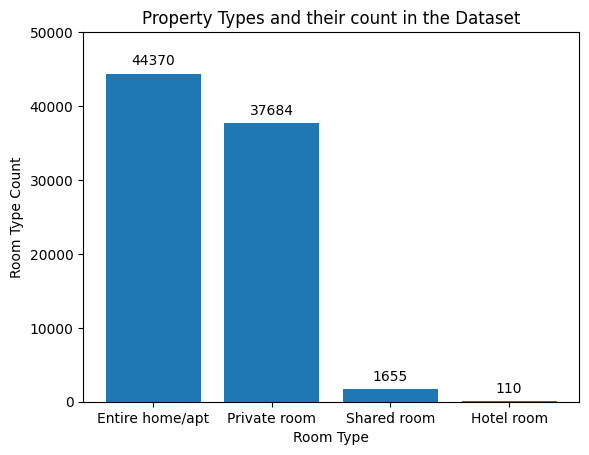

In [189]:
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [190]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34793
Manhattan,34742
Queens,11186
Bronx,2276
Staten Island,821
brookln,1


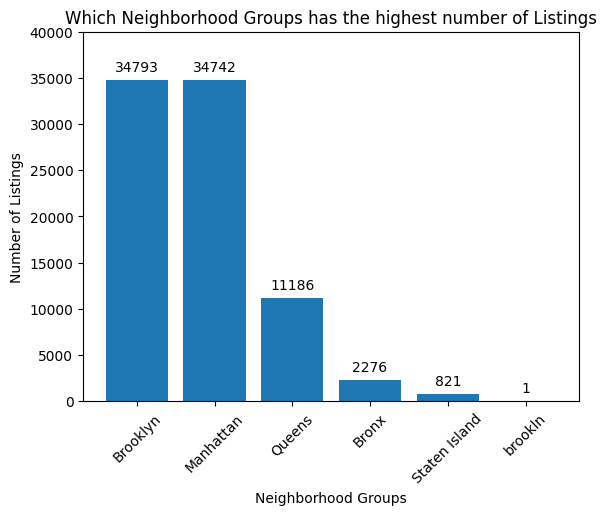

In [191]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4 );
plt.ylim([0,40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

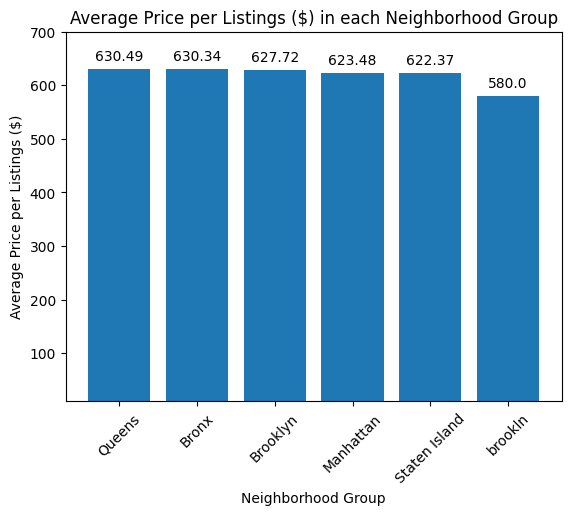

In [192]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([10,700]);
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

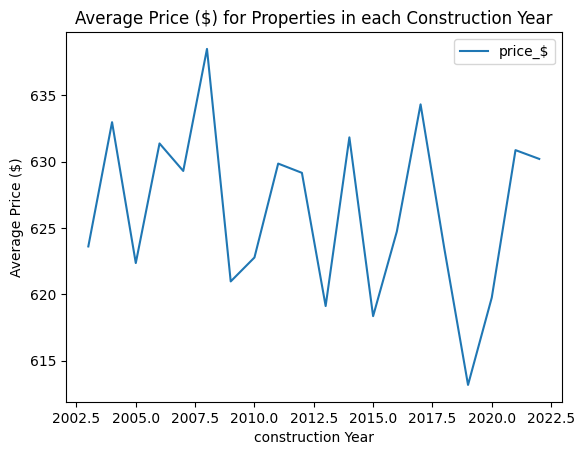

In [193]:
df.groupby(df['Construction year']) ['price_$'].mean().to_frame().plot();
plt.xlabel('construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Properties in each Construction Year');

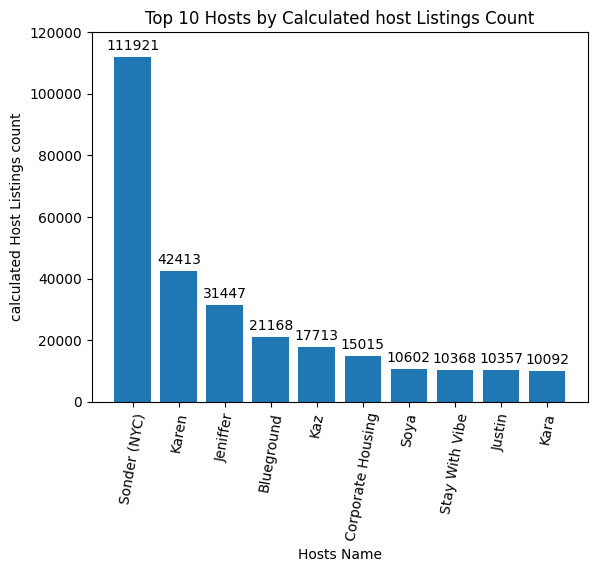

In [194]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('calculated Host Listings count');
plt.xticks (rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');

In [195]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284016
unconfirmed,3.273831


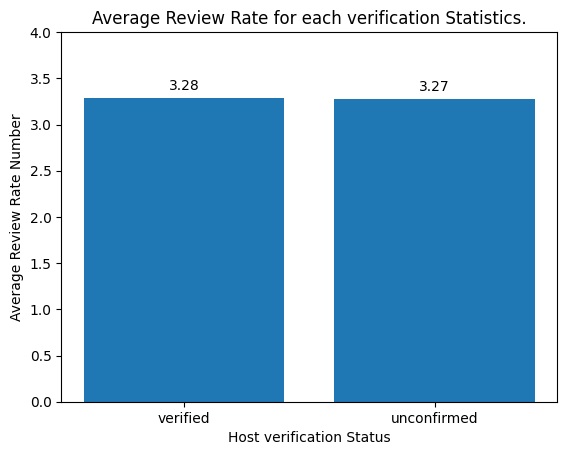

In [196]:
review_bar = plt.bar(review.index, review.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:, "review rate number"], 2), padding = 4 );
plt.ylim([0,4]);
plt.xlabel('Host verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each verification Statistics.');

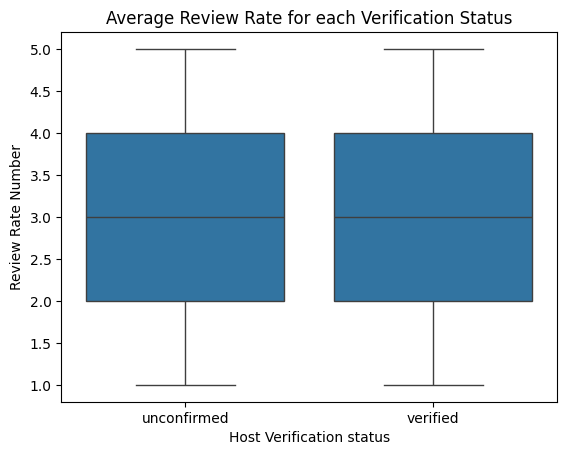

In [197]:
base_color= sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

In [198]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909077291451)

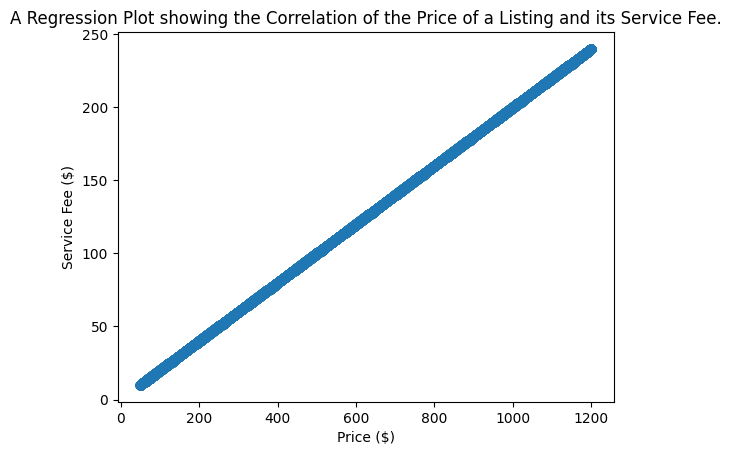

In [199]:
sns.regplot(df, x = 'price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');

In [200]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274861
                    Shared room                3.322368
Manhattan           Entire home/apt            3.269024
                    Hotel room                 3.500000
                    Private room               3.285801
                    Shared room                3.252976
Queens              Entire home/apt            3.347953
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286
brookln             Private room               4.000000

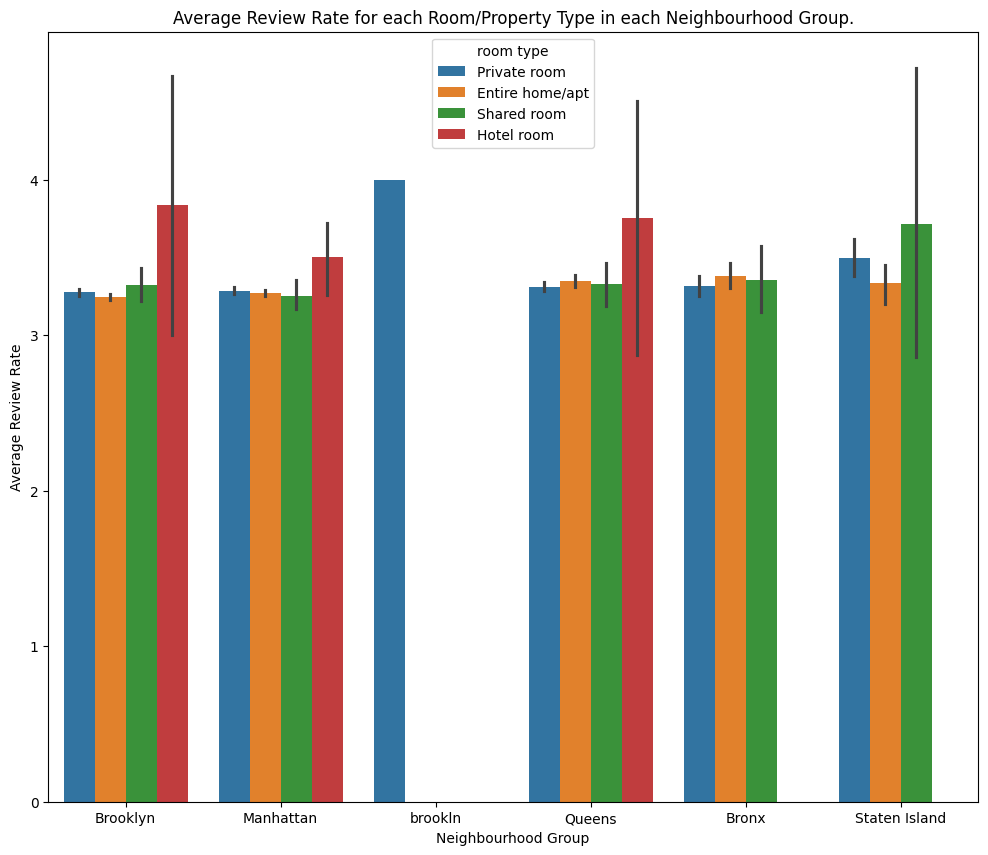

In [201]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

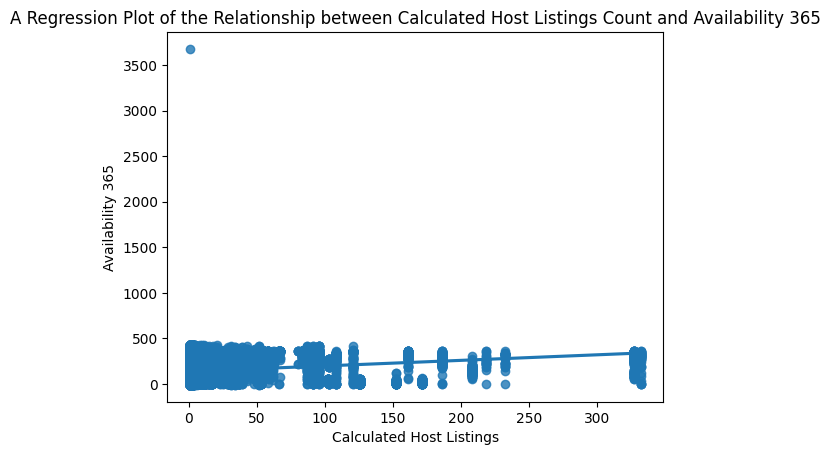

In [202]:
sns.regplot(df, x= 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [203]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13469788228165563)